# Machine Learning Introduction

Today we switch from data processing to the data analysis questions. 

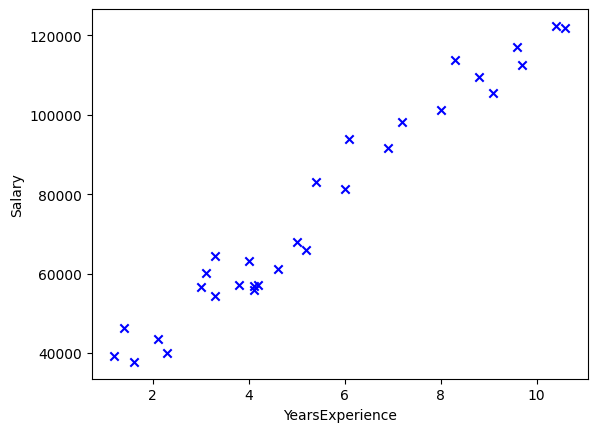

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt
    # plt.show()

# build_plot('../resources/telecom_cus.csv', 'age', 'income')
# build_plot('../resources/china_gdp.csv', 'Year', 'Value')
# build_plot('../resources/cust_segmentation_Data.csv', 'Income', 'Other Debt') 
# build_plot('../resources/heart.csv', 'chol', 'trtbps')
# build_plot('../resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions')

build_plot('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary').show()


## Simple Example

Here we have a simple example of dependency between years of experience of employees and their salaries. Can we predict the second parameter based on the value of first parameter.

We can assume that the dependency follows the linear model.

$$y\approx \theta_1 \cdot x + \theta_2$$

Here $\theta_1$ is the “slope” of the line, and $\theta_2$ is the intercept.

Can we make predictions of data? 

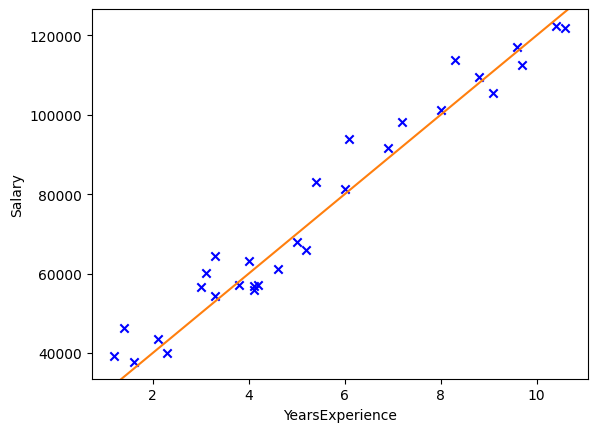

In [16]:
import numpy as np

def build_line(plt, theta):
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)

plt = build_plot('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')
build_line(plt, np.array([10000, 20000]))

## Gradient descent 

Let's suppose the predicted salary fits a linear model. How can we finc $\theta$? 

Many possibilities, but natural objective is to minimize some difference between this line 
and the observed data, e.g. squared loss:

$$E(\theta) = \sum_{i}(\theta_{1}*x_{i} + \theta_{2} - y_{i} )^{2}$$

Now we have to find the parameters, that minimize the value of function $E(\theta)$.

Best way of finding the values for function $f(x)$, in which it's value is minimal, is via finding the derivative. We begin at some point, and modify the input value in the direction of the negative derivative. For the case of multivariable functions we shall use partial derivatives.

To find a good value of $\theta$, we can repeatedly take steps in the direction of the 
negative derivatives for each value. Repeat:

$$ \theta_{1} := \theta_{1} - \alpha \frac{\delta}{\delta \theta_{1}} E(\theta_{1}, \theta_{2})$$

$$ \theta_{2} := \theta_{2} - \alpha \frac{\delta}{\delta \theta_{2}} E(\theta_{1}, \theta_{2})$$

where $\alpha$ is some small positive number called the step size.
This is the gradient decent algorithm, the workhorse of modern machine learning.

Note: 

$$\frac{\delta}{\delta \theta_{1}} E(\theta_{1}, \theta_{2}) = \sum_{i}2(\theta_{1}*x_{i} + \theta_{2} - y_{i} )*x_{1}$$

$$\frac{\delta}{\delta \theta_{2}} E(\theta_{1}, \theta_{2}) = \sum_{i}2(\theta_{1}*x_{i} + \theta_{2} - y_{i} )$$


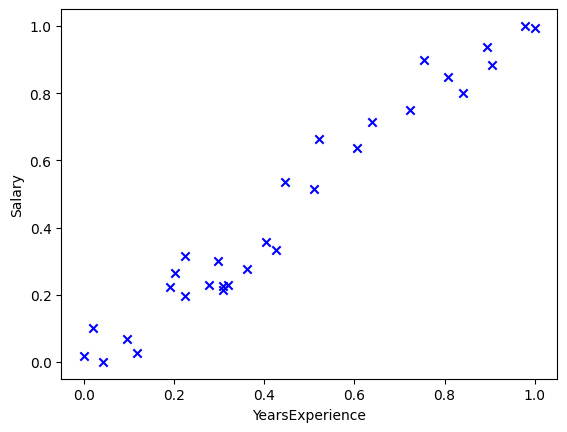

In [18]:
# do not forget to first normalize the data:

def build_plot_normalized(file_path, x, y):
    data = pd.read_csv(file_path)
    x_nor = (data[x] - min(data[x])) / (max(data[x]) - min(data[x]))
    y_nor = (data[y] - min(data[y])) / (max(data[y]) - min(data[y]))
    plt.scatter(x_nor, y_nor, c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot_normalized('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary').show()

## Visualizing the gradient descent:

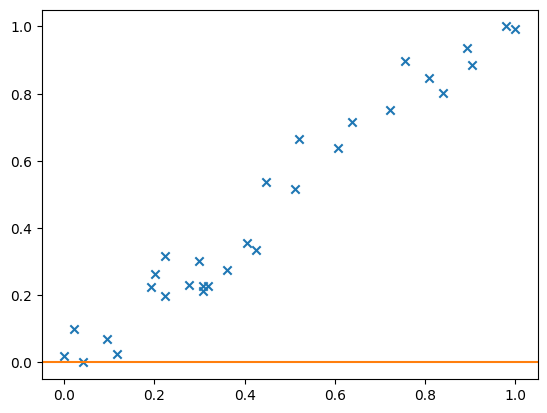

In [20]:
def get_data(file_path, x_name, y_name):
    data = pd.read_csv(file_path)
    return data[x_name], data[y_name]

def normalize_data(x):
    x_normalized = (x - min(x)) / (max(x) - min(x))
    return x_normalized

def gradient_descent(x, y, iters, alpha):
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return theta 

def plot_fit(x, y, theta):
    plt.scatter(x, y, marker = 'x')
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim) 

x, y = get_data('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')
x_normalized, y_normalized = normalize_data(x), normalize_data(y)

#first iteration
theta = gradient_descent(x_normalized, y_normalized, 0, 1.0)
plot_fit(x_normalized, y_normalized, theta)

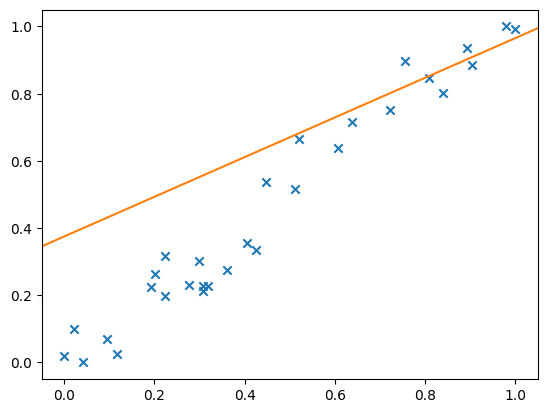

In [21]:
theta = gradient_descent(x_normalized, y_normalized, 1, 1.0)
plot_fit(x_normalized, y_normalized, theta)

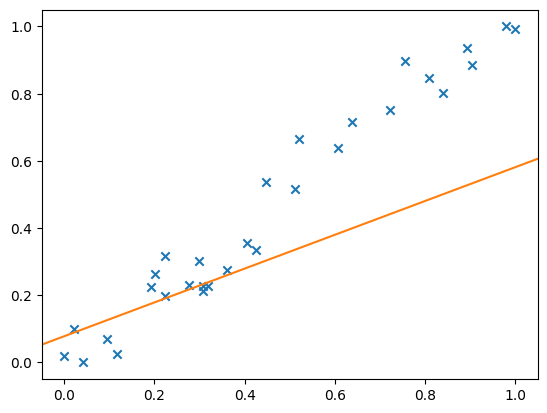

In [22]:
theta = gradient_descent(x_normalized, y_normalized, 2, 1.0)
plot_fit(x_normalized, y_normalized, theta)

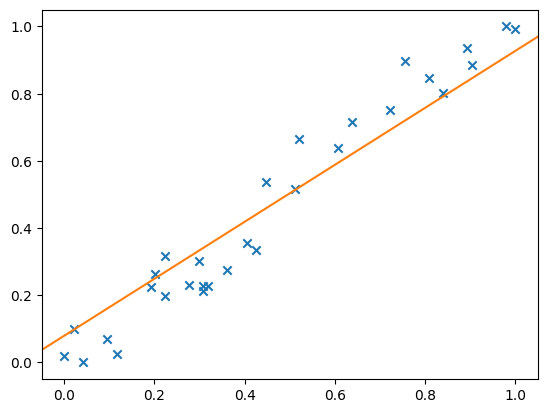

In [23]:
theta = gradient_descent(x_normalized, y_normalized, 5, 1.0)
plot_fit(x_normalized, y_normalized, theta)

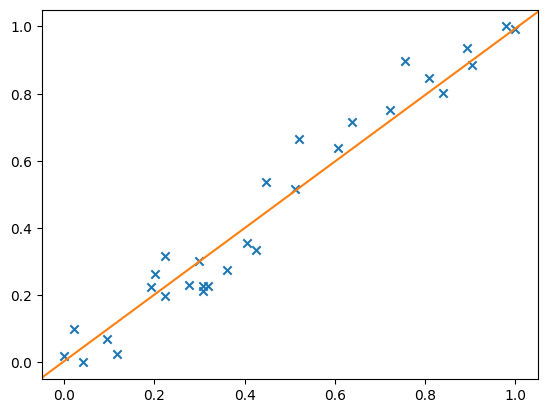

In [24]:
theta = gradient_descent(x_normalized, y_normalized, 10, 1.0)
plot_fit(x_normalized, y_normalized, theta)

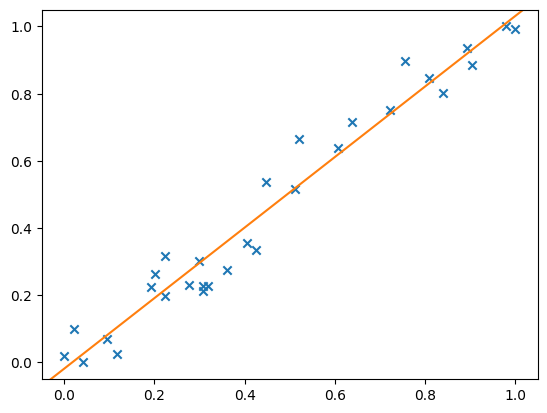

In [25]:
theta = gradient_descent(x_normalized, y_normalized, 100, 1.0)
plot_fit(x_normalized, y_normalized, theta)

## Error vs Iteration:

Text(0, 0.5, 'Average error')

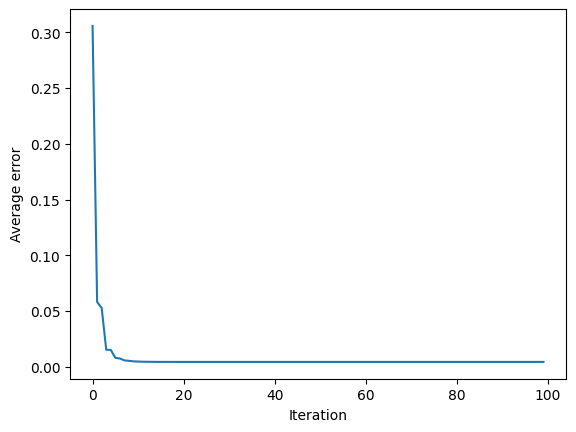

In [27]:
def gradient_descent_err(x, y, iters):
    err = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        err.append(np.mean((theta[0] * x + theta[1] - y)**2))
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return np.array(err)

plt.plot(np.arange(0,100), gradient_descent_err(x_normalized, y_normalized, 100))
plt.xlabel("Iteration")
plt.ylabel("Average error")

It is more informative to plot mean error on a log scale:

As you can see, the error is decreasing linearly with iteration number on the log scale; this means we will reach an optimal setting to numerical precision pretty quickly.

Text(0, 0.5, 'Average error minus optimal')

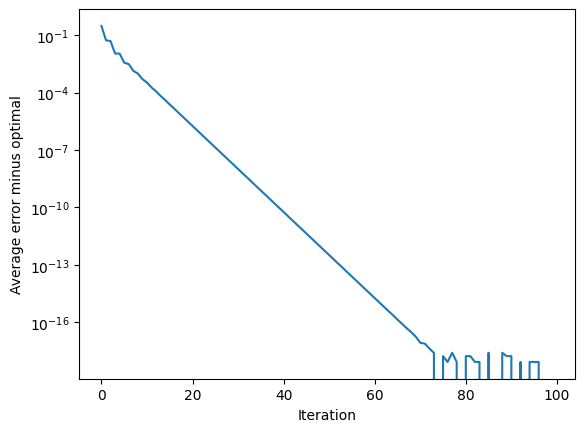

In [28]:
err = gradient_descent_err(x_normalized, y_normalized, 1000)
plt.semilogy(err[:100] - err[-1])
plt.xlabel("Iteration")
plt.ylabel("Average error minus optimal")